
# Individual Assignment — Data Analysis with Pandas

## Overview
You will work individually using **two real‑world style datasets**:

1. Coffee Shop Sales Dataset — retail transactions analysis  
2. Ride Hailing Trips Dataset — transport service analysis  

The goal is to practice **beginner Pandas skills** in a meaningful way:
- Loading data
- Cleaning missing values
- Checking duplicates
- Creating new columns
- Sorting and grouping
- Datetime conversion
- Basic visualization

Write your answers using **code cells under each question**.


In [1]:

import pandas as pd
import matplotlib.pyplot as plt

coffee = pd.read_csv("Coffee_Shop_Sales.csv")
rides = pd.read_csv("Ride_Hailing_Trips.csv")

coffee.head(), rides.head()


(  TransactionID        Date     City   Product    Size  Quantity  \
 0       CFE0250  2025-10-27  Mombasa     Latte   Large         1   
 1       CFE0226  2025-03-04  Nairobi  Smoothie  Medium         3   
 2       CFE0008  2025-04-03   Nakuru       Tea   Large         1   
 3       CFE0189  2025-07-16   Kisumu  Espresso  Medium         1   
 4       CFE0270  2026-01-28   Nakuru  Smoothie   Small         1   
 
    UnitPrice_KES PaymentMethod  Revenue_KES  
 0            324          Card          324  
 1            430          Cash         1290  
 2            216          Card          216  
 3            415        M-Pesa          415  
 4            161          Cash          161  ,
     TripID    TripDate PickupCity  Distance_km  Duration_min  Fare_KES  \
 0  TRP0287  2025-10-17     Kisumu         11.4            31       564   
 1  TRP0019  2025-06-18     Nakuru         17.7            14       804   
 2  TRP0242  2026-02-03    Mombasa          9.0            15      1097   
 


# Dataset 1 — Coffee Shop Sales

### Scenario
You are a data analyst working for a coffee chain. Management wants to understand:
- Sales trends
- Best‑selling products
- Revenue by location



## Question 1 — Data Cleaning
Convert Date to datetime.

Check:
- Missing values
- Duplicate TransactionID

Remove duplicates and fill missing City values with "Unknown".


In [13]:
#checking for missing values

coffee.isnull().sum()

TransactionID     0
Date              0
City             20
Product           0
Size              0
Quantity          0
UnitPrice_KES     0
PaymentMethod     0
Revenue_KES       0
dtype: int64

In [29]:
#replacing missing values

coffee = coffee.fillna("Unknown")
coffee.isnull().sum()

TransactionID    0
Date             0
City             0
Product          0
Size             0
Quantity         0
UnitPrice_KES    0
PaymentMethod    0
Revenue_KES      0
dtype: int64

In [30]:
#checking for duplicates

coffee.duplicated().sum()

np.int64(12)

In [32]:
#removing duplicates

coffee = coffee.drop_duplicates()
coffee.duplicated().sum()

np.int64(0)


## Question 2 — Feature Engineering
Create:
- TotalRevenue_KES = Quantity × UnitPrice_KES
- Month extracted from Date


In [35]:
#creating TotalRevenue_KES

coffee['TotalRevenue_KES'] = coffee['Quantity'] * coffee['UnitPrice_KES']
coffee.head()

,TransactionID,Date,City,Product,Size,Quantity,UnitPrice_KES,PaymentMethod,Revenue_KES,TotalRevenue_KES
0,CFE0250,2025-10-27,Mombasa,Latte,Large,1,324,Card,324,324
1,CFE0226,2025-03-04,Nairobi,Smoothie,Medium,3,430,Cash,1290,1290
2,CFE0008,2025-04-03,Nakuru,Tea,Large,1,216,Card,216,216
3,CFE0189,2025-07-16,Kisumu,Espresso,Medium,1,415,M-Pesa,415,415
4,CFE0270,2026-01-28,Nakuru,Smoothie,Small,1,161,Cash,161,161


In [40]:
#Creating Month

#Checking if the datatype of month is datetime
coffee.dtypes

TransactionID       object
Date                object
City                object
Product             object
Size                object
Quantity             int64
UnitPrice_KES        int64
PaymentMethod       object
Revenue_KES          int64
TotalRevenue_KES     int64
dtype: object

In [42]:
#Converting date to datetime

coffee['Date'] = pd.to_datetime(coffee['Date'])
coffee.dtypes

TransactionID               object
Date                datetime64[ns]
City                        object
Product                     object
Size                        object
Quantity                     int64
UnitPrice_KES                int64
PaymentMethod               object
Revenue_KES                  int64
TotalRevenue_KES             int64
dtype: object

In [44]:
#Extracting the month from the date

coffee['Month'] = coffee['Date'].dt.month_name()
coffee.head()

,TransactionID,Date,City,Product,Size,Quantity,UnitPrice_KES,PaymentMethod,Revenue_KES,TotalRevenue_KES,Month
0,CFE0250,2025-10-27,Mombasa,Latte,Large,1,324,Card,324,324,October
1,CFE0226,2025-03-04,Nairobi,Smoothie,Medium,3,430,Cash,1290,1290,March
2,CFE0008,2025-04-03,Nakuru,Tea,Large,1,216,Card,216,216,April
3,CFE0189,2025-07-16,Kisumu,Espresso,Medium,1,415,M-Pesa,415,415,July
4,CFE0270,2026-01-28,Nakuru,Smoothie,Small,1,161,Cash,161,161,January



## Question 3 — Sorting
Find the top 10 highest revenue transactions sorted descending.


In [47]:
coffee.sort_values('Revenue_KES', ascending = False).head(10)

,TransactionID,Date,City,Product,Size,Quantity,UnitPrice_KES,PaymentMethod,Revenue_KES,TotalRevenue_KES,Month
46,CFE0273,2025-03-25,Mombasa,Smoothie,Large,4,546,Cash,2184,2184,March
14,CFE0105,2025-02-14,Mombasa,Espresso,Medium,4,517,M-Pesa,2068,2068,February
162,CFE0284,2025-08-28,Nairobi,Cappuccino,Medium,4,511,Cash,2044,2044,August
168,CFE0112,2025-03-03,Nairobi,Cappuccino,Medium,4,506,Cash,2024,2024,March
69,CFE0267,2025-02-26,Mombasa,Espresso,Small,4,499,Card,1996,1996,February
105,CFE0015,2025-07-25,Nakuru,Espresso,Small,4,493,Cash,1972,1972,July
139,CFE0152,2025-12-15,Nairobi,Smoothie,Medium,4,470,Card,1880,1880,December
65,CFE0221,2025-08-07,Nairobi,Espresso,Large,4,470,Card,1880,1880,August
255,CFE0057,2025-12-06,Eldoret,Latte,Medium,4,467,M-Pesa,1868,1868,December
182,CFE0033,2025-07-29,Nairobi,Cappuccino,Medium,4,458,Cash,1832,1832,July



## Question 4 — GroupBy
Calculate total revenue by Product and City.
Which product performs best?


In [65]:
coffee.groupby(['Product','City'])['TotalRevenue_KES'].sum()

Product     City   
Cappuccino  Eldoret    10737
            Kisumu      5199
            Mombasa     7153
            Nairobi    10390
            Nakuru     10824
            Unknown     1996
Espresso    Eldoret     8476
            Kisumu      6506
            Mombasa     8609
            Nairobi     6318
            Nakuru      7514
            Unknown     2842
Latte       Eldoret     6515
            Kisumu      4193
            Mombasa     9191
            Nairobi     6150
            Nakuru      9999
            Unknown     2112
Mocha       Eldoret     5820
            Kisumu      4156
            Mombasa     7386
            Nairobi     3420
            Nakuru      5998
            Unknown     3205
Smoothie    Eldoret     8448
            Kisumu      7333
            Mombasa     5834
            Nairobi     6835
            Nakuru     14967
            Unknown     4013
Tea         Eldoret     8994
            Kisumu      6798
            Mombasa     5312
            Nairobi    


## Question 5 — Visualization
Create a bar chart showing Total Revenue by Product.


In [50]:
import matplotlib.pyplot as plt

In [59]:
#grouping totals by product

total_byProduct = coffee.groupby('Product')['TotalRevenue_KES'].sum().reset_index()
total_byProduct

,Product,TotalRevenue_KES
0,Cappuccino,46299
1,Espresso,40265
2,Latte,38160
3,Mocha,29985
4,Smoothie,47430
5,Tea,48240


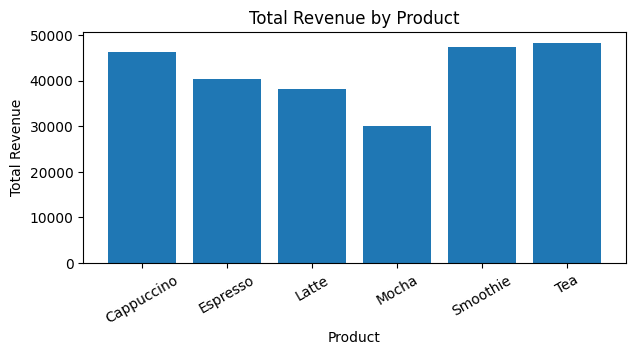

In [92]:
#creating the bar chart 

plt.figure(figsize=(7,3))
plt.bar(total_byProduct['Product'], total_byProduct['TotalRevenue_KES'])
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.xticks(rotation=30)
plt.show()


# Dataset 2 — Ride Hailing Trips

### Scenario
You are analyzing data for a ride‑hailing company.



## Question 1 — Preparation
Convert TripDate to datetime.

Check:
- Missing DriverRating
- Duplicate TripID

Fill missing ratings with the average.


In [100]:
#converting TripDate to dateTime

rides['TripDate'] = pd.to_datetime(rides['TripDate'])
rides.dtypes

TripID                  object
TripDate        datetime64[ns]
PickupCity              object
Distance_km            float64
Duration_min             int64
Fare_KES                 int64
DriverRating           float64
PaymentType             object
dtype: object

In [101]:
#check for missing values

rides.isnull().sum()

TripID          0
TripDate        0
PickupCity      0
Distance_km     0
Duration_min    0
Fare_KES        0
DriverRating    0
PaymentType     0
dtype: int64

In [102]:
#filling missing ratings with average

rides['DriverRating'] = rides['DriverRating'].fillna(rides['DriverRating'].mean())
rides.isnull().sum()

TripID          0
TripDate        0
PickupCity      0
Distance_km     0
Duration_min    0
Fare_KES        0
DriverRating    0
PaymentType     0
dtype: int64

In [106]:
#checking for duplicate TripID

rides['TripID'].duplicated().sum()

np.int64(10)

In [111]:
#removing duplicates

rides = rides.drop_duplicates()
rides.duplicated().sum()

np.int64(0)


## Question 2 — New Columns
Create:
- FarePerKm = Fare_KES / Distance_km
- TripHour extracted from TripDate


In [112]:
#creating FarePerKm

rides['FarePerKm'] = rides['Fare_KES']/rides['Distance_km']
rides.head()

,TripID,TripDate,PickupCity,Distance_km,Duration_min,Fare_KES,DriverRating,PaymentType,FarePerKm
0,TRP0287,2025-10-17,Kisumu,11.4,31,564,3.210000,Card,49.473684
1,TRP0019,2025-06-18,Nakuru,17.7,14,804,3.510000,Card,45.423729
2,TRP0242,2026-02-03,Mombasa,9.0,15,1097,4.810000,Cash,121.888889
3,TRP0017,2025-10-14,Mombasa,10.5,25,2446,3.480000,Cash,232.952381
4,TRP0251,2025-04-18,Nairobi,19.1,21,2302,4.023369,M-Pesa,120.523560



## Question 3 — Sorting
Find the longest 10 trips by Distance_km.


In [115]:
rides.sort_values('Distance_km', ascending = False).head(10)

,TripID,TripDate,PickupCity,Distance_km,Duration_min,Fare_KES,DriverRating,PaymentType,FarePerKm
133,TRP0109,2025-08-28,Mombasa,24.8,11,784,3.740000,Cash,31.612903
94,TRP0155,2025-12-29,Kisumu,24.8,10,1764,3.050000,Card,71.129032
163,TRP0006,2025-09-25,Kisumu,24.8,29,294,3.890000,Cash,11.854839
87,TRP0089,2025-08-15,Kisumu,24.8,30,445,3.420000,Cash,17.943548
57,TRP0138,2025-12-27,Nairobi,24.8,24,607,4.950000,Card,24.475806
250,TRP0073,2026-01-04,Nairobi,24.7,45,1574,4.980000,M-Pesa,63.724696
105,TRP0056,2025-12-02,Nakuru,24.6,6,1183,3.710000,M-Pesa,48.089431
253,TRP0009,2025-07-11,Nakuru,24.6,54,2045,4.050000,Card,83.130081
200,TRP0299,2025-05-28,Mombasa,24.4,56,1255,4.023369,Card,51.434426
146,TRP0078,2025-05-28,Kisumu,24.2,16,1104,3.650000,Card,45.619835



## Question 4 — Group Analysis
Calculate average Fare_KES and DriverRating by PickupCity.


In [122]:
rides.groupby('PickupCity')[['Fare_KES', 'DriverRating']].mean().reset_index()

,PickupCity,Fare_KES,DriverRating
0,Kisumu,1493.763158,3.976098
1,Mombasa,1285.383721,4.035545
2,Nairobi,1236.484848,4.116517
3,Nakuru,1378.209677,3.960110



## Question 5 — Visualization
Create a bar chart showing Average Fare_KES by PickupCity.


In [127]:
#grouping 

averageFare_byPickupCity = rides.groupby('PickupCity')['Fare_KES'].mean()
averageFare_byPickupCity

PickupCity
Kisumu     1493.763158
Mombasa    1285.383721
Nairobi    1236.484848
Nakuru     1378.209677
Name: Fare_KES, dtype: float64

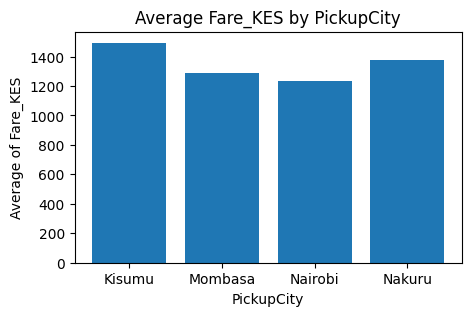

In [131]:
#displaying chart

plt.figure(figsize=(5,3))

plt.bar(averageFare_byPickupCity.index, averageFare_byPickupCity.values)
plt.title('Average Fare_KES by PickupCity')
plt.xlabel('PickupCity')
plt.ylabel('Average of Fare_KES')
plt.show()